<a href="https://colab.research.google.com/github/Jff24/Hands-on-Computer-Vision/blob/main/Sesiones/Sesion2/Sesion2_3_Transformaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Transformaciones](https://drive.google.com/uc?id=1TWC2QgVky_x-tBmr-apJE4VUxApl1W4q)

#**Hands-on Sesión 2.3: Transformaciones de imágenes digitales** 🏞️


## **Contenido**

[**1. Creando Histogramas**](#tema1)

[**2. Trasformaciones geométricas afines**](#tema2)

[**3. Transformaciones de intensidad a nivel de píxel**](#tema3)

[**4. Ecualización de Histograma**](#tema4)

[**5. CLAHE (Contrast Limited Adaptive Histogram Equalization)**](#tema5)

[**6. Ampliación del Histograma (Contrast Stretching)**](#tema6)

[**7. Preguntas**](#tema7)

In [2]:
import numpy as np
import scipy.signal
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

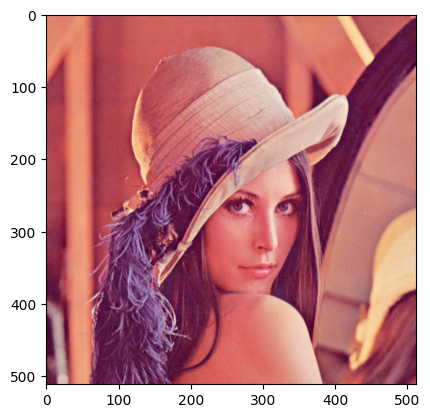

In [3]:
import urllib.request


resp = urllib.request.urlopen("https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Imagenes/Lena512x512.png")
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv.imdecode(image_data, cv.IMREAD_UNCHANGED)


image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

## <font color='#4C5FDA'>**1. Creando Histogramas**</font> <a name="tema1">


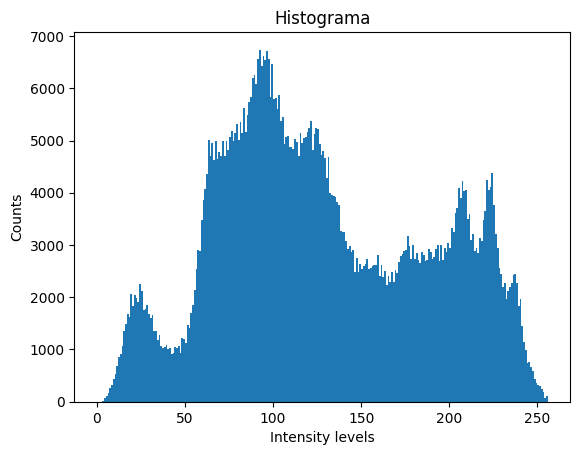

In [ ]:
plt.hist(image.ravel(), bins = 256, range = [0,256]), plt.xlabel('Intensity levels'); plt.ylabel('Counts'); plt.title('Histograma');

## <font color="EB9A54"> **Reto No.1:** </font> Calcula el histograma para los 3 canales RGB y graficalo

In [ ]:
# Reto No.1: Calcula el histograma para los 3 canales RGB y graficalos
# Aqui tu codigo:

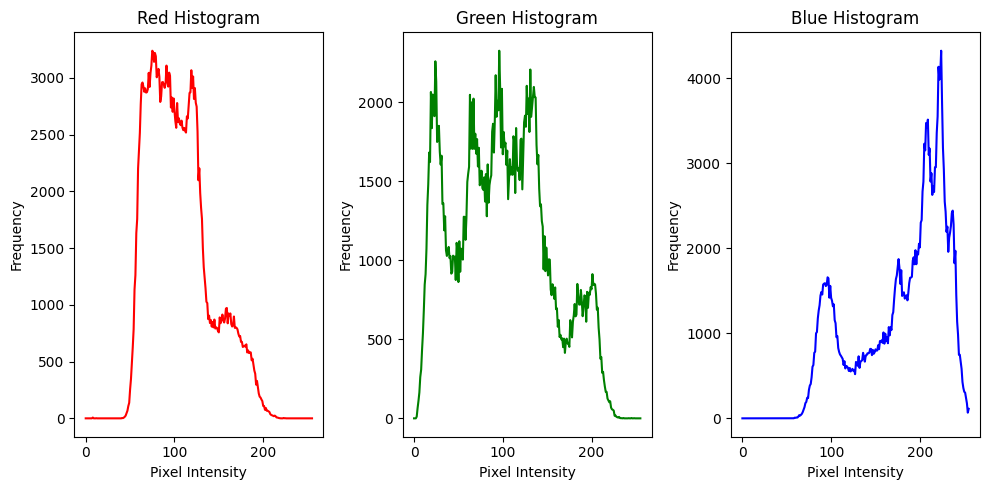

In [ ]:
# Rta No.1:
blue, green, red = cv.split(image)

hist_r = cv.calcHist([red], [0], None, [256], [0, 256])
hist_g = cv.calcHist([green], [0], None, [256], [0, 256])
hist_b = cv.calcHist([blue], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_r, color='r')
plt.title('Red Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(hist_g, color='g')
plt.title('Green Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.plot(hist_b, color='b')
plt.title('Blue Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Rta No.2

## <font color='#4C5FDA'>**2. Trasformaciones geométricas afines**</font> <a name="tema2">


## **Translación, rotación y escalado** 🔄


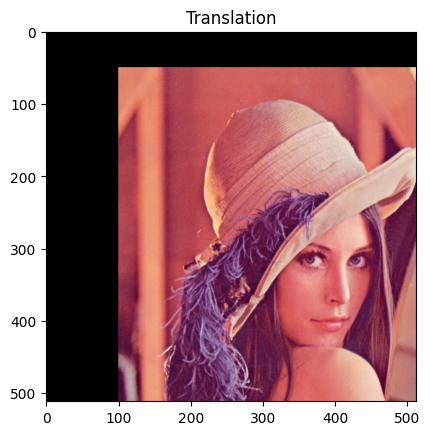

In [ ]:
# Image translation con OpenCV
h, w = image.shape[:2]
transition_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(img_transition), plt.title("Translation");
plt.show()

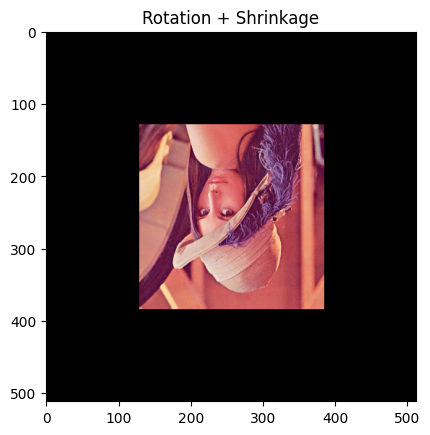

In [ ]:
# Image rotation + shrinkage
h, w = image.shape[:2]
rotation_matrix = cv.getRotationMatrix2D(center = (w/2, h/2), angle = -180, scale = 0.5)
rotated_image = cv.warpAffine(src=image, M=rotation_matrix, dsize=(w, h))

plt.imshow(rotated_image), plt.title("Rotation + Shrinkage")
plt.show()

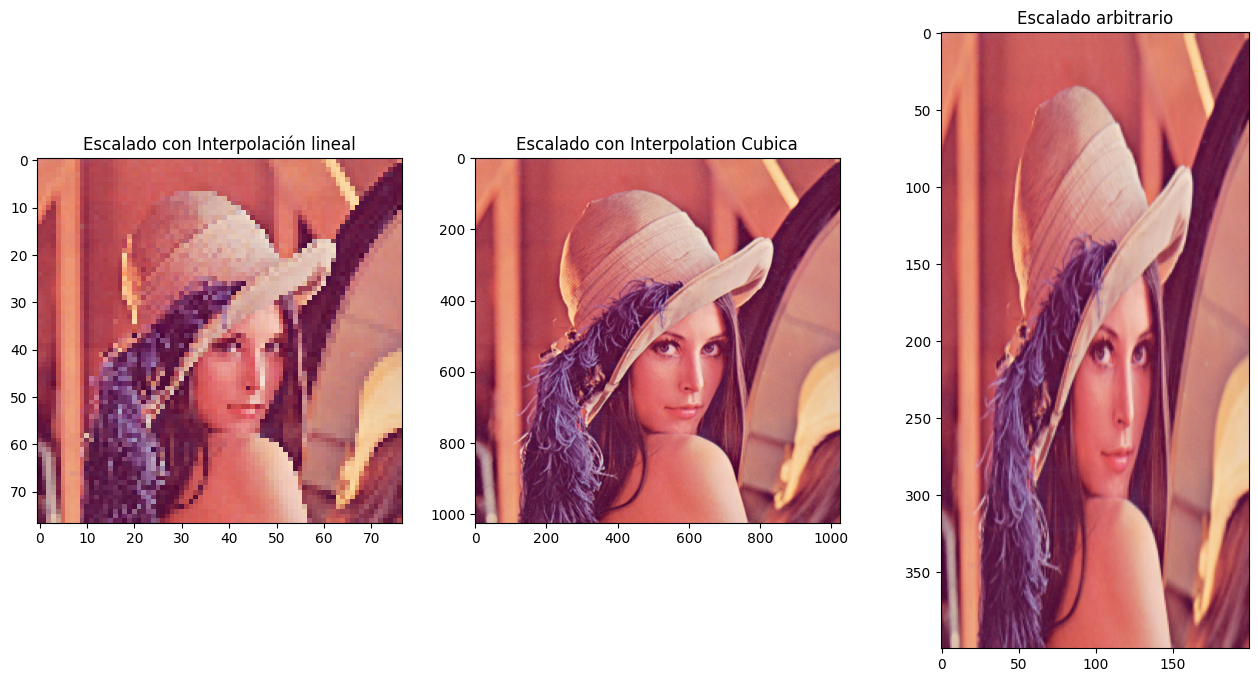

In [ ]:
# Escalando
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15) # 0.15 veces su tamaño original
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # 2 veces su tamaño original
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA) # definiendo el tamaño arbitrariamente

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image_scaled), ax[0].set_title("Escalado con Interpolación lineal");
ax[1].imshow(image_scaled_2), ax[1].set_title("Escalado con Interpolation Cubica");
ax[2].imshow(image_scaled_3), ax[2].set_title("Escalado arbitrario");

## <font color= "52F17F"> **Hazlo tu mismo Nº1:**  </font>  Prueba diferentes transformaciones

En la transformación afín, todas las líneas paralelas de la imagen original seguirán siendo paralelas en la imagen de salida. Para encontrar la matriz de transformación, necesitamos tres puntos de la imagen de entrada y sus ubicaciones correspondientes en la imagen de salida. Luego, cv2.getAffineTransform creará una matriz de 2x3 que se pasará a cv2.warpAffine.

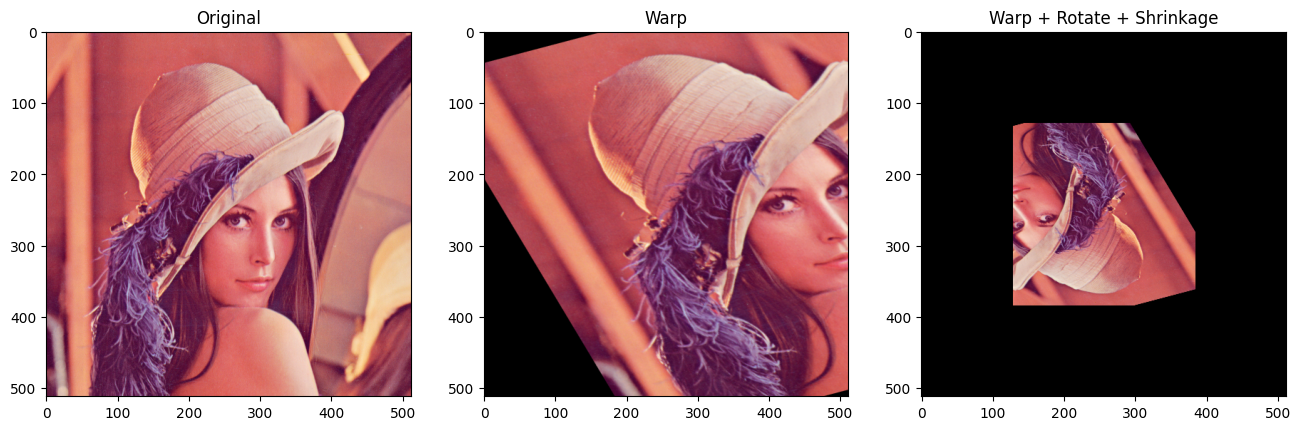

In [ ]:
# Crea diferentes matrices M (puedes usar getAffineTransform) y haz la transformación afín con warpAffine
ptsIn = np.float32([[50,50],[200,50],[50,200]])
ptsOut = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(ptsIn, ptsOut)
imageTransformed = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Puedes hacer transformaciones consecutivas (Warp + rotate + shrink)
imageTransformed2 = cv.warpAffine(imageTransformed, rotation_matrix, (imageTransformed.shape[1], imageTransformed.shape[0]))

# Plot
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image), ax[0].set_title("Original");
ax[1].imshow(imageTransformed), ax[1].set_title("Warp");
ax[2].imshow(imageTransformed2), ax[2].set_title("Warp + Rotate + Shrinkage");

## <font color="EB9A54"> **Reto No.2:** </font> Cúal transformada provoca la siguiente imagen?

In [ ]:
# Reto No. 2: Cúal transformada provoca la siguiente imagen?


In [ ]:
# Rta:

## <font color='#4C5FDA'> **3. Transformaciones de intensidad a nivel de píxel** </font> <a name="tema3">



## **Negativa** ➖

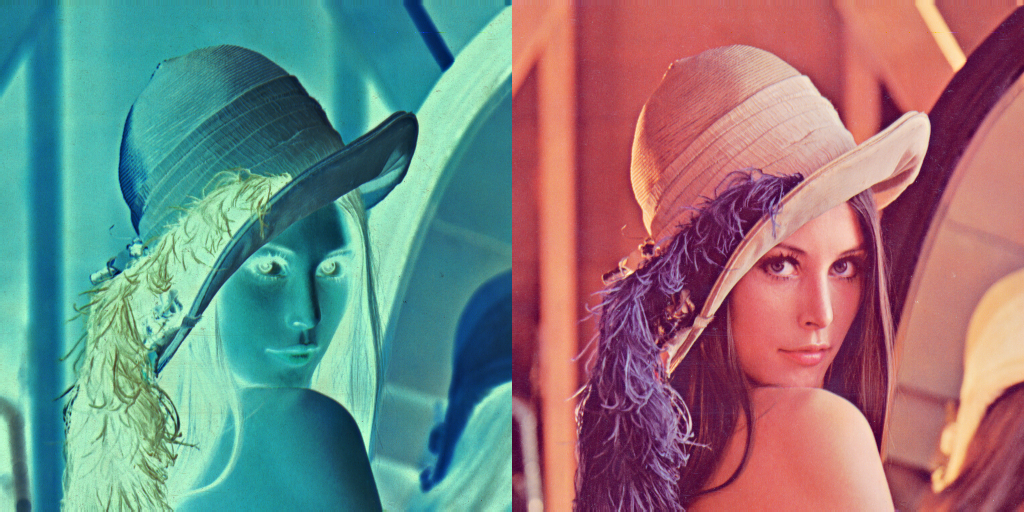

In [ ]:
# Calcule negativa
im_i = 255 - image

# Invirtiendo nuevamente debe dar la original
im_i2 = 255 - im_i

# Plot
im_neg = np.concatenate((im_i, im_i2), axis=1)
Image.fromarray(np.uint8(im_neg))

## **Umbralización** ☀️

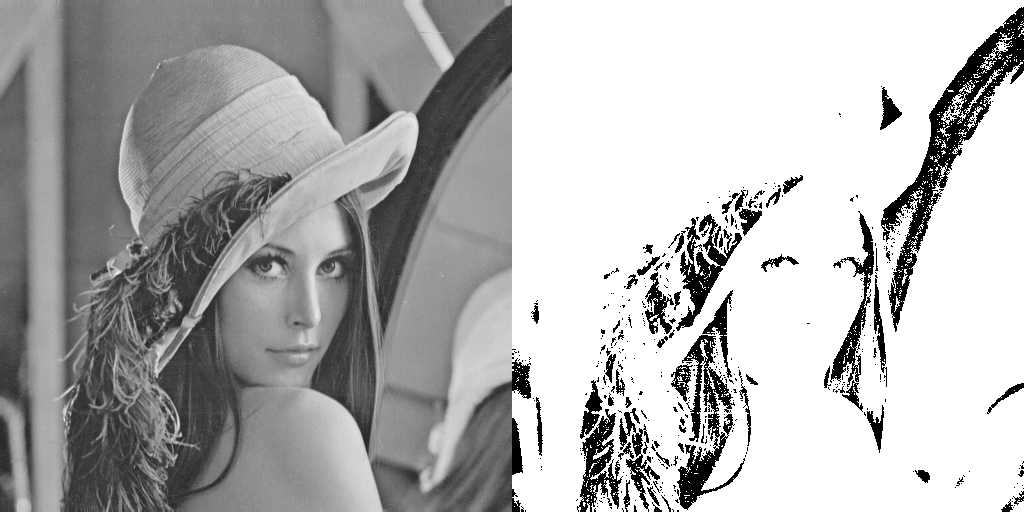

In [ ]:
imgray = np.round(np.mean(image, axis=2)).astype("uint8") #Convirtiendo de color a gray (existen mejores formas)
im_bin_64 = (imgray > 64) * 255
im_bin = np.concatenate((imgray,im_bin_64), axis=1)
Image.fromarray(np.uint8(im_bin))

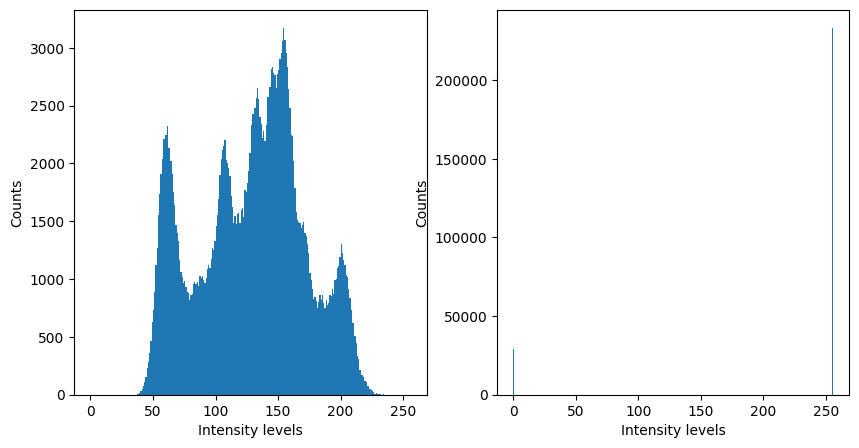

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(imgray.ravel(), bins = 256, range = [0,256]), ax[0].set_xlabel('Intensity levels'); ax[0].set_ylabel('Counts');
ax[1].hist(im_bin_64.ravel(), bins = 256, range = [0,256]), ax[1].set_xlabel('Intensity levels'); ax[1].set_ylabel('Counts');

## <font color="EB9A54"> **Reto No. 3:** </font> Genera 3 umbralizaciones adicionales y concatenalas.

In [ ]:
# Reto No. 3: Genera 3 umbralizaciones adicionales y concatenalas

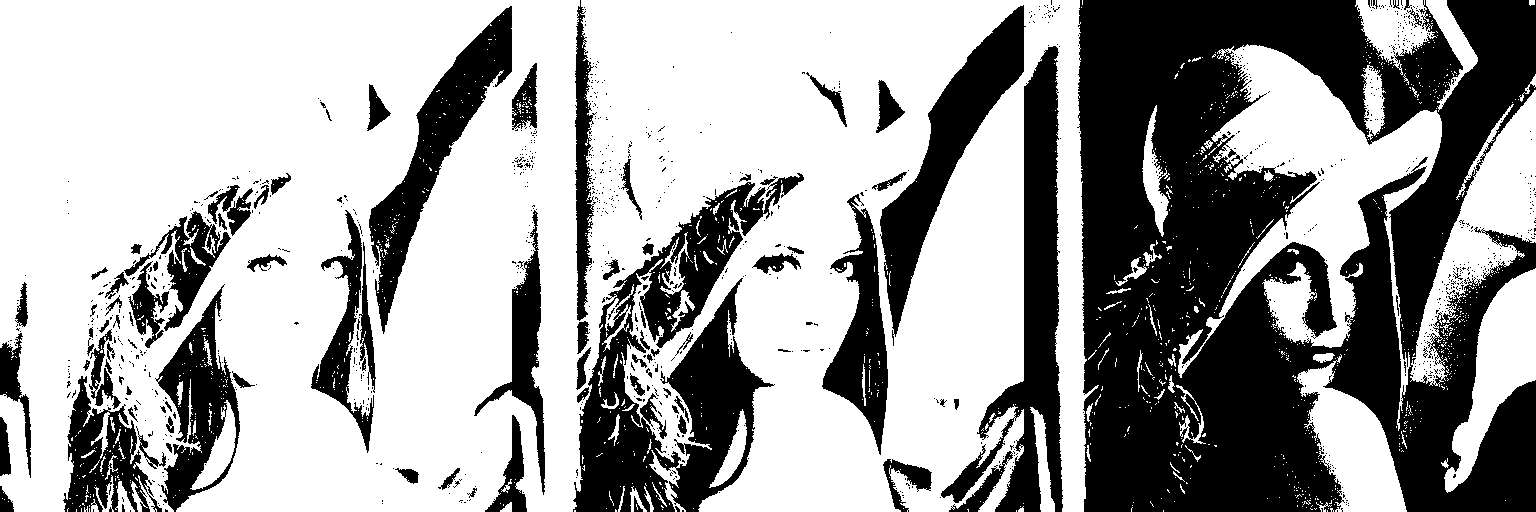

In [ ]:
# Rta:
_, thresholded_image = cv.threshold(imgray, 75, 255, cv.THRESH_BINARY)
_, thresholded_image_1 = cv.threshold(imgray, 100, 255, cv.THRESH_BINARY)
_, thresholded_image_2 = cv.threshold(imgray, 150, 255, cv.THRESH_BINARY)


im_bin = np.concatenate((thresholded_image,thresholded_image_1, thresholded_image_2), axis=1)
Image.fromarray(np.uint8(im_bin))

In [ ]:
# Pinta los histogramas

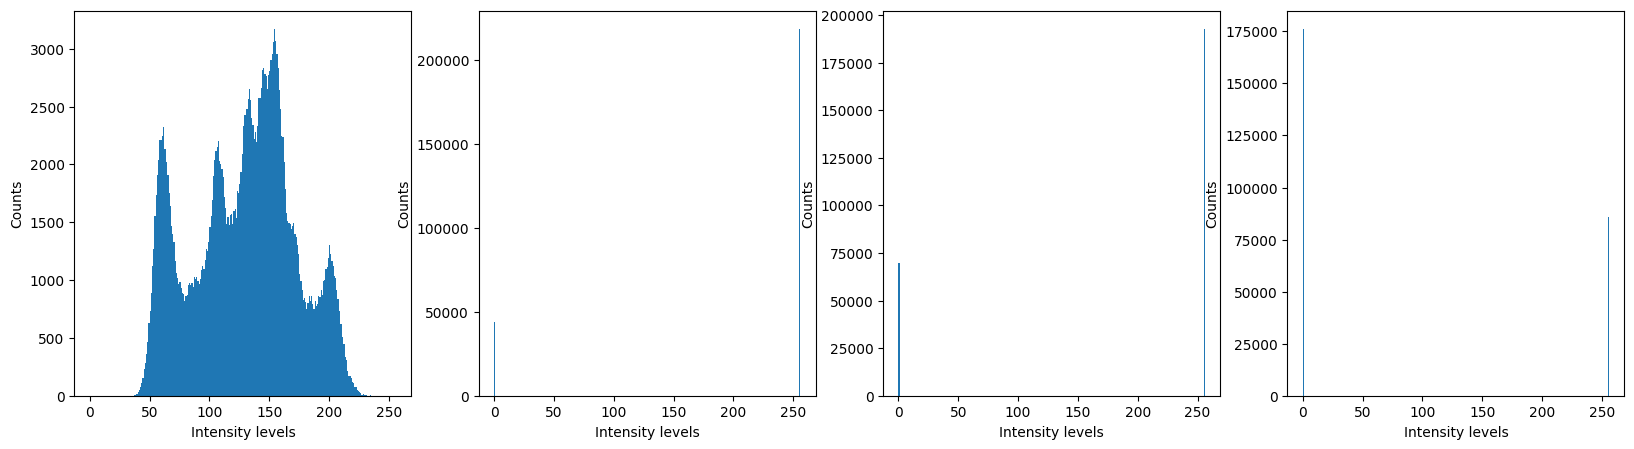

In [ ]:
# Rta:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].hist(imgray.ravel(), bins = 256, range = [0,256]), ax[0].set_xlabel('Intensity levels'); ax[0].set_ylabel('Counts');
ax[1].hist(thresholded_image.ravel(), bins = 256, range = [0,256]), ax[1].set_xlabel('Intensity levels'); ax[1].set_ylabel('Counts');
ax[2].hist(thresholded_image_1.ravel(), bins = 256, range = [0,256]), ax[2].set_xlabel('Intensity levels'); ax[2].set_ylabel('Counts');
ax[3].hist(thresholded_image_2.ravel(), bins = 256, range = [0,256]), ax[3].set_xlabel('Intensity levels'); ax[3].set_ylabel('Counts');

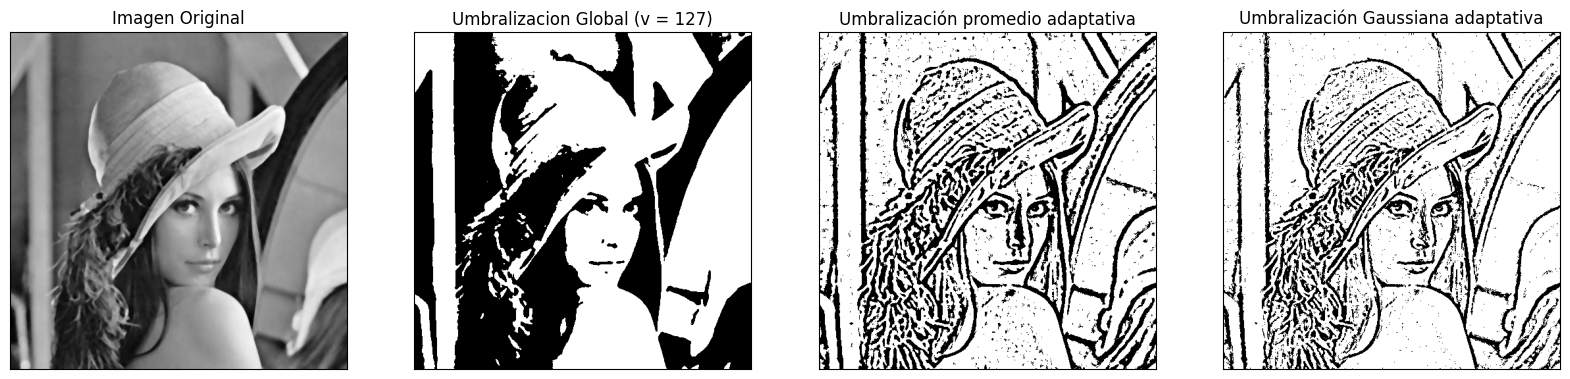

In [ ]:
# Aplicando Umbralización con OpenCV
img = imgray
img = cv.medianBlur(img,5)

ret, th1 = cv.threshold(img, 127, 255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Imagen Original', 'Umbralizacion Global (v = 127)', 'Umbralización promedio adaptativa', 'Umbralización Gaussiana adaptativa']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # Para esconder los "ticks"
plt.show()

## **Corrección Gamma** ❗

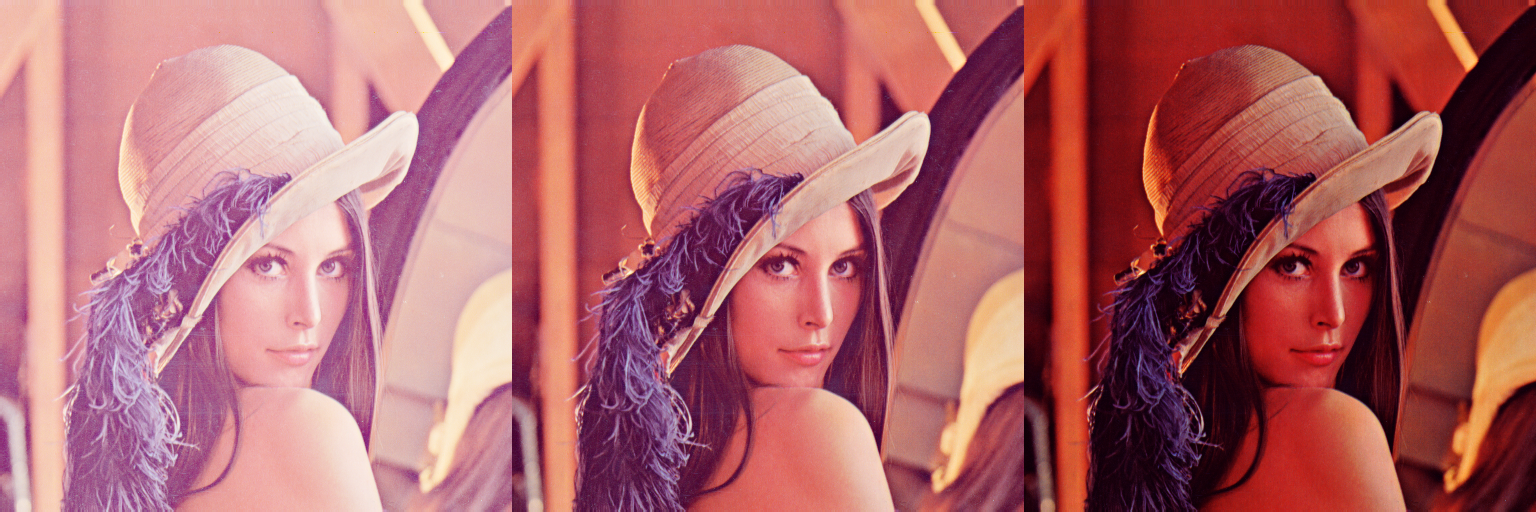

In [ ]:
im_gamma1 = 255.0 * (image / 255.0)**(1 / 2.2)
im_gamma2 = 255.0 * (image / 255.0)**2.2

im_gamma = np.concatenate((im_gamma1, image, im_gamma2), axis=1)
Image.fromarray(np.uint8(im_gamma))

## <font color="EB9A54"> **Reto No. 4:** </font> Prueba diferentes valores de gamma para otra imagen de interés



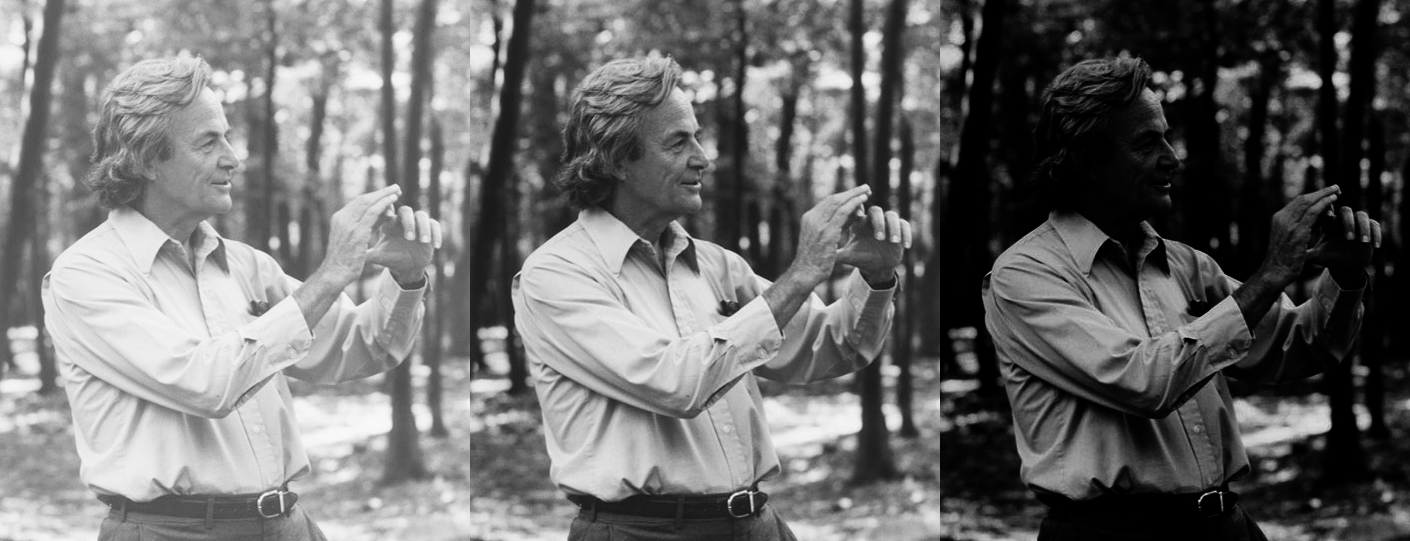

In [7]:
# Reto No. 4: Prueba diferentes valores de gamma para otra imagen de interés

img_url_2 = "https://upload.wikimedia.org/wikipedia/commons/1/1a/RichardFeynman-PaineMansionWoods1984_copyrightTamikoThiel_bw.jpg"

img_2 = urllib.request.urlopen(img_url_2)
image_data_2 = np.asarray(bytearray(img_2.read()), dtype="uint8")

image_2 = cv.imdecode(image_data_2, cv.IMREAD_COLOR)
image_gray_2 = cv.imdecode(image_data_2, cv.IMREAD_GRAYSCALE)


#image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)
#plt.imshow(image_2)
#plt.show()

gamma_corrected_Feynman_1 = np.power(image_2/255.0, 0.5 ) * 255.0
gamma_corrected_Feynman_2 = np.power(image_2/255.0, 3.5) * 255.0

im_gamma_feynman = np.concatenate((gamma_corrected_Feynman_1, image_2, gamma_corrected_Feynman_2), axis=1)
Image.fromarray(np.uint8(im_gamma_feynman))

## <font color='#4C5FDA'> **4. Ecualización del Histograma** </font> <a name="tema4">


In [ ]:
# Convertir y dividir la imagen LAB (Luminance = Lightness) L es como calcular la media de los 3 canales

resp = urllib.request.urlopen("https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/main/Sesiones/Sesion2/Imagenes/Einstein_1_lowcontrast.tif")
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")

image = cv.imdecode(image_data, cv.IMREAD_UNCHANGED)
if len(image.shape) == 2:
    image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

lab_img = cv.cvtColor(image, cv.COLOR_BGR2LAB)

l, a, b = cv.split(lab_img)

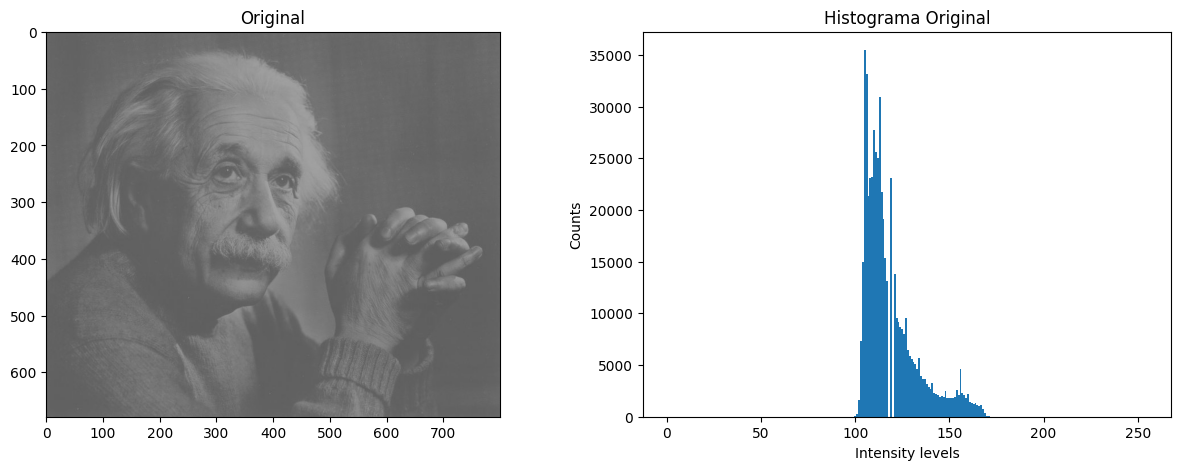

In [ ]:
# Mostrar imagen original de luminancia y su histograma
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(image), plt.title('Original');
plt.subplot(122), plt.hist(l.ravel(), bins=256, range=(0,255)); plt.xlabel('Intensity levels'); plt.ylabel('Counts'); plt.title('Histograma Original');

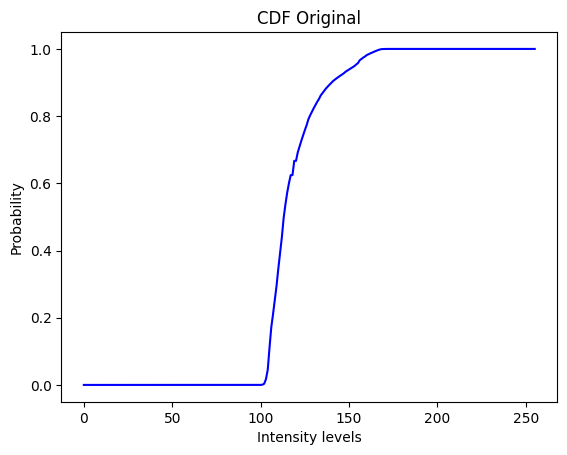

In [ ]:
# Calculemos la CDF y analicemosla
hist, bins = np.histogram(l.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_norm_orig = cdf / cdf.max()
plt.plot(cdf_norm_orig, color = 'b'), plt.xlabel('Intensity levels'); plt.ylabel('Probability'); plt.title('CDF Original');
plt.show()

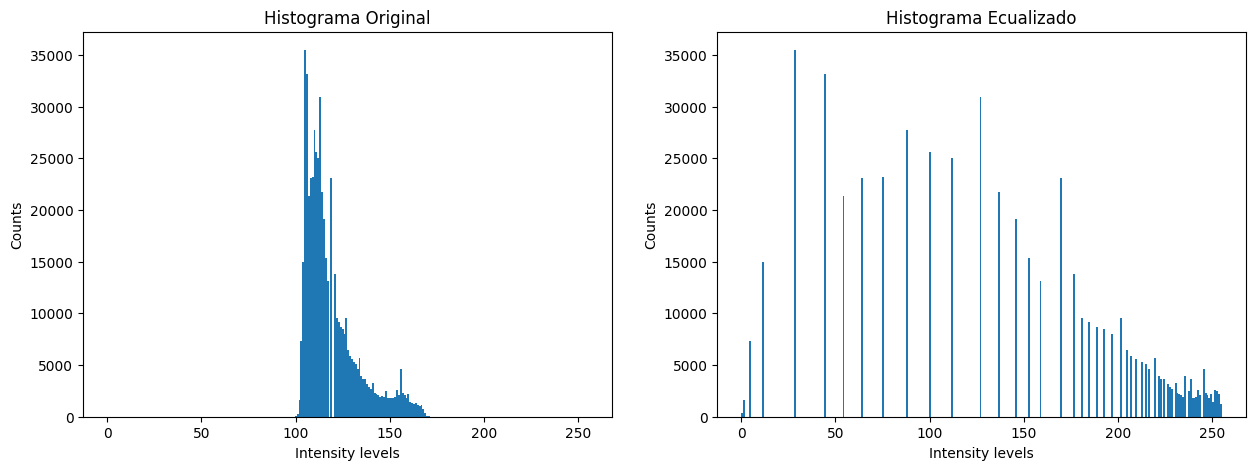

In [ ]:
# Aplicar ecualización de histograma al canal L
equ = cv.equalizeHist(l)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.hist(l.ravel(), bins=256, range=(0,255)); plt.xlabel('Intensity levels'); plt.ylabel('Counts'); plt.title('Histograma Original');
plt.subplot(122), plt.hist(equ.flat, bins=256, range=(0,255)), plt.xlabel('Intensity levels'); plt.ylabel('Counts'); plt.title('Histograma Ecualizado');

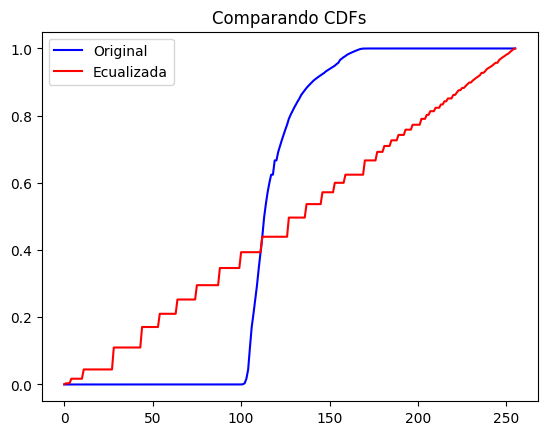

In [ ]:
hist, bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_norm_eq = cdf / cdf.max()
plt.plot(cdf_norm_orig, color = 'b')
plt.plot(cdf_norm_eq, color = 'r')
plt.title('Comparando CDFs')
plt.legend(["Original", "Ecualizada"], loc="upper left")
plt.show()

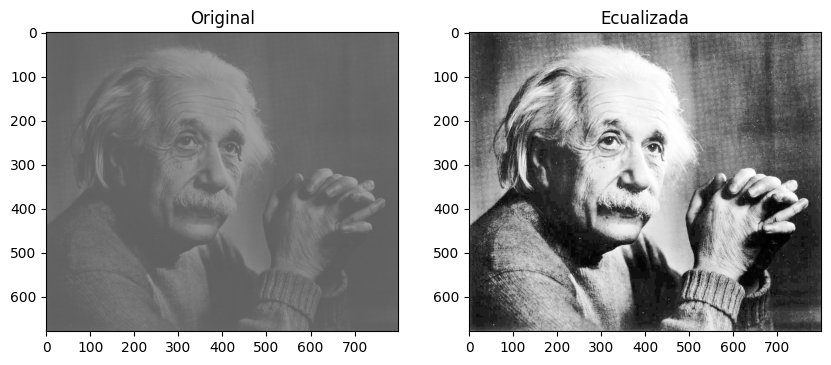

In [ ]:
# Combine la imagen ecualizada con los canales a y b, y conviertala de vuelta a RGB
updated_lab_img1 = cv.merge((equ,a,b))
hist_eq_img = cv.cvtColor(updated_lab_img1, cv.COLOR_LAB2BGR)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image), plt.title('Original');
plt.subplot(122), plt.imshow(hist_eq_img), plt.title('Ecualizada');

## <font color="EB9A54"> **Reto No. 5:** </font> Intenta hacer una ecualización del histograma de una imagen RGB. Cómo lo harías?

In [ ]:
# Reto No. 5: Intenta hacer una ecualización del histograma de una imagen RGB. Cómo lo harías?

## <font color='#4C5FDA'> **5. CLAHE (Contrast Limited Adaptive Histogram Equalization)** </font> <a name="tema5">

Una mejor manera de ecualizar un histograma se logra a través de la ecualización de histograma adaptativa. En este, la imagen se divide en pequeños bloques llamados "mosaicos" (tileSize es 8x8 de forma predeterminada en OpenCV). Luego, cada uno de estos bloques se ecualiza como de costumbre. Entonces, en un área pequeña, el histograma se limitaría a una región pequeña (a menos que haya ruido). Si hay ruido, se amplificará. Para evitar esto, se aplica limitación de contraste. Si algún "bin" del histograma está por encima del límite de contraste especificado (por defecto 40 en OpenCV), esos píxeles se recortan y distribuyen uniformemente a otros "bins" antes de aplicar la ecualización del histograma. Después de la ecualización, para eliminar artefactos en los bordes de los mosaicos, se aplica la interpolación bilineal.

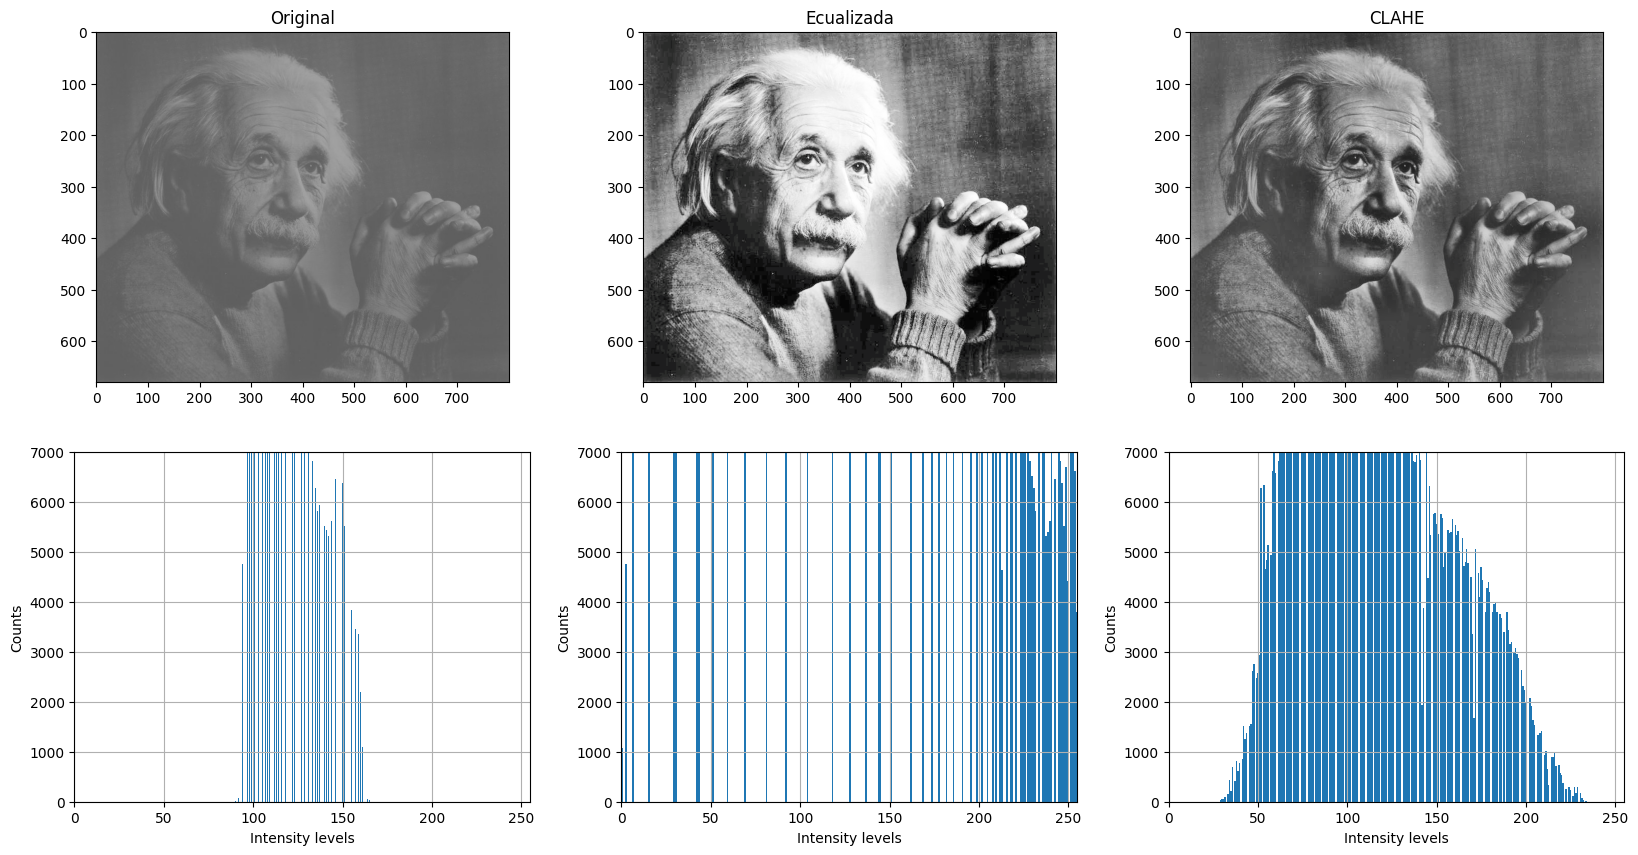

In [ ]:
# Cree y aplique CLAHE al canal L
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)

# Recombine y convierta de vuelta a RGB
updated_lab_img2 = cv.merge((clahe_img,a,b))
CLAHE_img = cv.cvtColor(updated_lab_img2, cv.COLOR_LAB2BGR)

# Plot
plt.figure(figsize=(20,10))
plt.subplot(231), plt.imshow(image), plt.title('Original')
plt.subplot(232), plt.imshow(hist_eq_img), plt.title('Ecualizada')
plt.subplot(233), plt.imshow(CLAHE_img), plt.title('CLAHE')
plt.subplot(234), plt.hist(image.ravel(),256), plt.axis([0,255,0,7e3]), plt.grid(True); plt.xlabel('Intensity levels'); plt.ylabel('Counts');
plt.subplot(235), plt.hist(hist_eq_img.ravel(),256), plt.axis([0,255,0,7e3]), plt.grid(True); plt.xlabel('Intensity levels'); plt.ylabel('Counts');
plt.subplot(236), plt.hist(CLAHE_img.ravel(),256), plt.axis([0,255,0,7e3]), plt.grid(True); plt.xlabel('Intensity levels'); plt.ylabel('Counts');

## <font color="EB9A54"> **Reto No. 6:** </font> Prueba con diferentes parámetros el método `createCLAHE()` . Cuáles te dan mejor resultado?


## <font color='#4C5FDA'> **6. Ampliación del Histograma (Contrast Stretching)** </font> <a name="tema6">


Es una técnica de mejora de la imagen que intenta mejorar el contraste estirando los valores de intensidad de una imagen para llenar todo el rango dinámico. La función de transformación utilizada es siempre lineal y monótonamente creciente.

**Nota:** La ampliación del contraste solo es posible si el valor de intensidad mínimo y el valor de intensidad máximo no son iguales a los valores de intensidad mínimo y máximo posibles. De lo contrario, la imagen generada después de ampliar el contraste será la misma que la imagen de entrada.

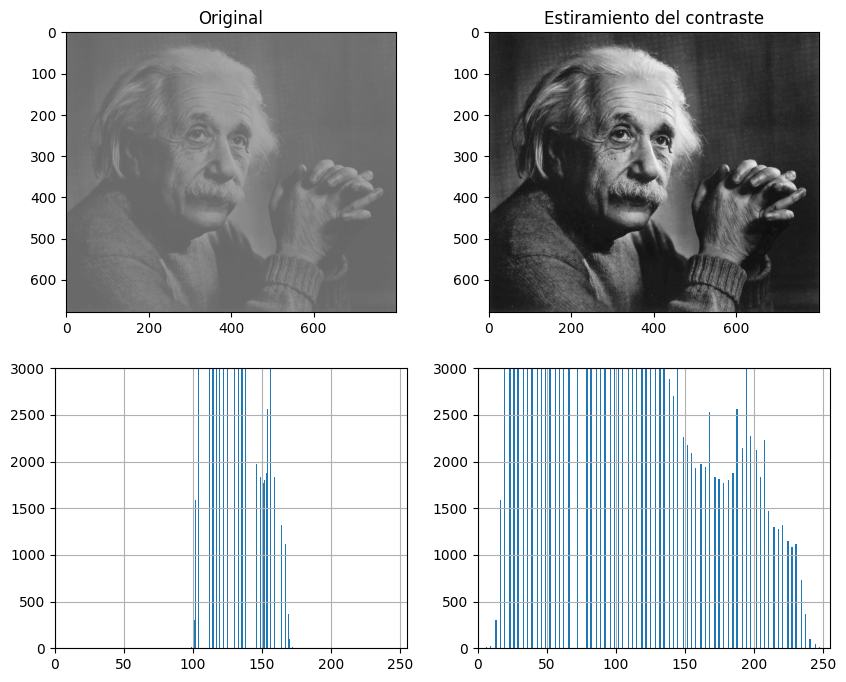

In [ ]:
I = l
Imin = np.amin(I)
Imax = np.amax(I)
Is = (255/(Imax-Imin))*(I.astype(np.float64) - Imin)
Is = Is.astype(np.uint8)

plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(I,'gray',vmin=0, vmax=255), plt.title('Original')
plt.subplot(222), plt.imshow(Is,'gray',vmin=0, vmax=255), plt.title('Estiramiento del contraste')
plt.subplot(223), plt.hist(I.ravel(),256), plt.axis([0,255,0,3e3]), plt.grid(True)
plt.subplot(224), plt.hist(Is.ravel(),256), plt.axis([0,255,0,3e3]), plt.grid(True);

## **Diferencia entre Estiramiento de Contraste y Ecualización del Histograma**❓


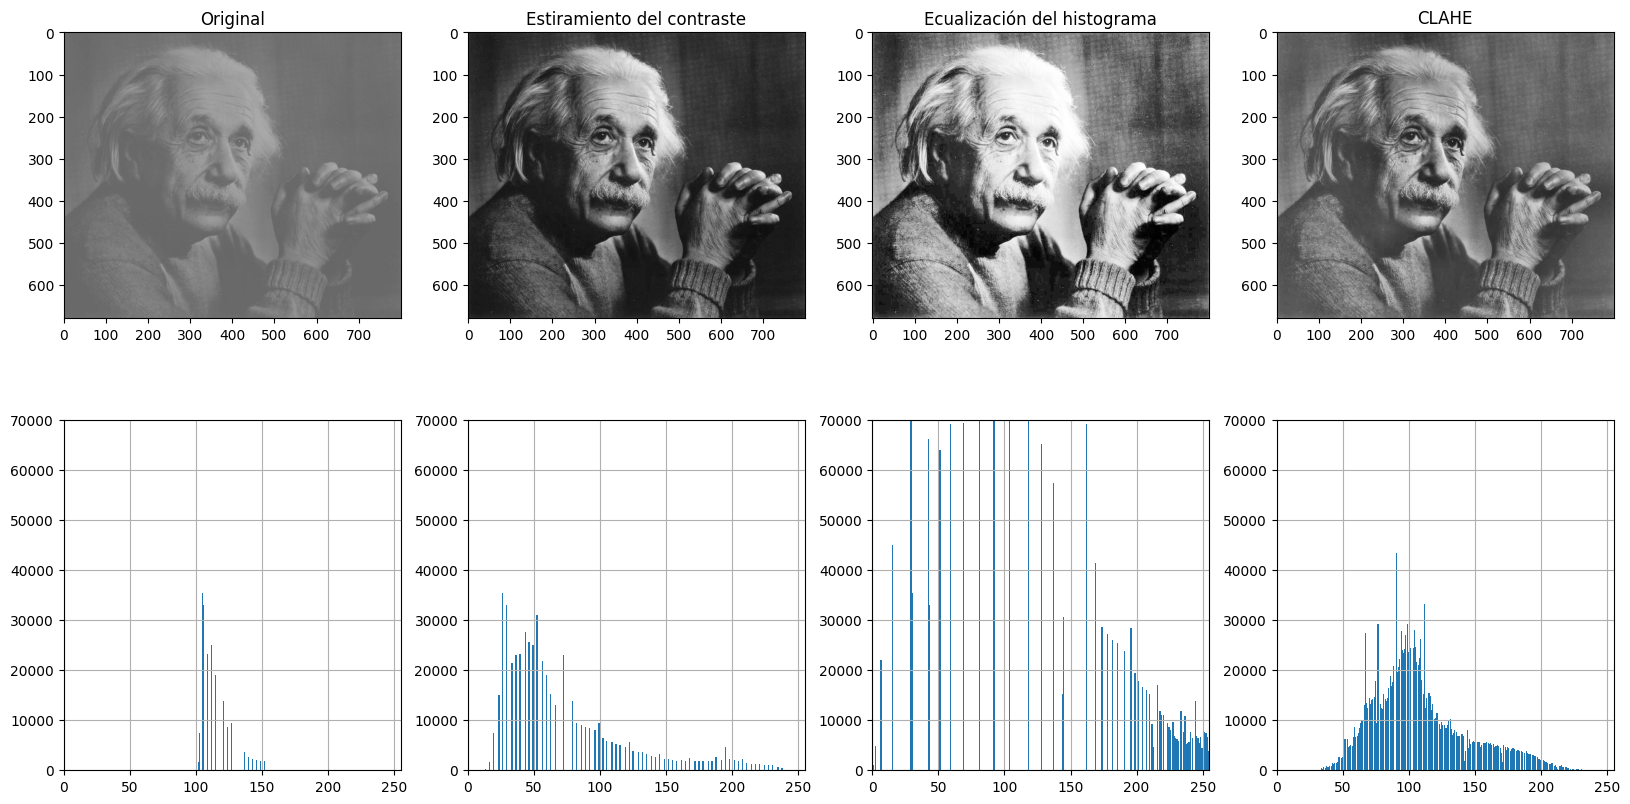

In [ ]:
# Plot
plt.figure(figsize=(20,10))
plt.subplot(241), plt.imshow(I,'gray',vmin=0, vmax=255), plt.title('Original')
plt.subplot(242), plt.imshow(Is,'gray',vmin=0, vmax=255), plt.title('Estiramiento del contraste')
plt.subplot(243), plt.imshow(hist_eq_img,'gray',vmin=0, vmax=255), plt.title('Ecualización del histograma')
plt.subplot(244), plt.imshow(CLAHE_img,'gray',vmin=0, vmax=255), plt.title('CLAHE')
plt.subplot(245), plt.hist(I.ravel(),256), plt.axis([0,255,0,70e3]), plt.grid(True)
plt.subplot(246), plt.hist(Is.ravel(),256), plt.axis([0,255,0,70e3]), plt.grid(True);
plt.subplot(247), plt.hist(hist_eq_img.ravel(),256), plt.axis([0,255,0,70e3]), plt.grid(True);
plt.subplot(248), plt.hist(CLAHE_img.ravel(),256), plt.axis([0,255,0,70e3]), plt.grid(True);

## <font color='#4C5FDA'> **7. Preguntas** </font> <a name="tema7">

1.   ¿Cuál crees que es la diferencia entre "estiramiento" y "ecualización" del histograma?
2.   Investiga sobre AHE y CLAHE. ¿Cuáles son las diferencias?

